In [61]:
# A simple example of a fully connected deep neural network (FCN)
# The FCN trains on images from ten classes, then takes an image
# and estimates which class it represents

In [62]:
# Import matplotlib to display digit images

import matplotlib.pyplot as plt

# Import PyTorch data used in example program

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as xforms
from torch.autograd import Variable

In [63]:
input_size = 3072  # The image size = 32x32x3 = 
hidden_size = 500  # Number of nodes in the hidden layer
num_classes = 10  # Number of output classes (0..9)
num_epochs = 5  # Number of times DNN is trained on training dataset
batch_size = 100  # The size of input data for one iteration
learning_rate = 0.001  # The speed of convergence

In [64]:
# Read om training and test datasets, these are included as part of
# PyTorch's dataset repository

train_dataset = dsets.CIFAR10( root ='./data', train=True, transform=xforms.ToTensor(), download=True )
test_dataset = dsets.CIFAR10( root='./data', train=False, transform=xforms.ToTensor() )

classes = [ 'plane','car','bird','cat','deer','dog','frog','horse','ship','truck' ]

Files already downloaded and verified


frog deer dog car


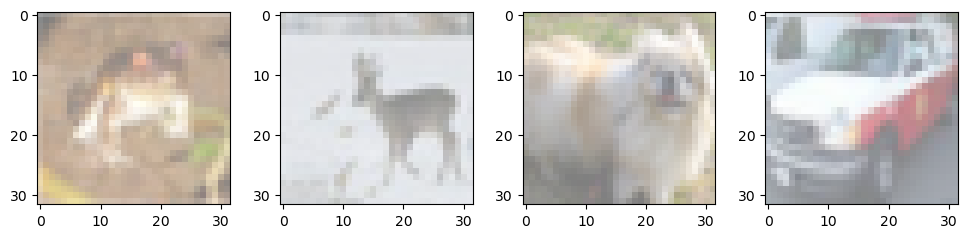

In [65]:
# Let's look at four of the images in the training dataset, and the
# corresponding label (which defines the object the image represents)

# Grab the first four images and corresponding objects they represent
# from the training set

img = []
val = []

for i in range( 4 ):
    im, v = train_dataset[ 20 * i ]
    img.append( im )
    val.append( v )
    
    img[ i ] = img[ i ] / 2 + 0.5
    img[ i ] = img[ i ].numpy()
    img[ i ] = img[ i ].transpose( 1, 2, 0 )
    
# Print out what objects the four images are meant to represent
    
print( ' '.join( classes[ val[ i ] ] for i in range( 4 ) ) )
    
# Create a single row of four images
    
fig, axes = plt.subplots( 1, 4, figsize=( 12, 2.5 ) )
for i in range( 4 ):
    axes[ i ].imshow( img[ i ] )

In [66]:
# Create training and test dataloaders, these will load and cache data of batch_size during
# looping, training data is shuffled randomly, test data is not

train_loader = torch.utils.data.DataLoader( dataset=train_dataset, batch_size=batch_size, shuffle=True )
test_loader = torch.utils.data.DataLoader( dataset=test_dataset, batch_size=batch_size, shuffle=False )

In [67]:
net = nn.Sequential(
  nn.Linear( input_size, hidden_size ),  # fully connected layer, 784 (input data) -> 500 (hidden layer)
  nn.ReLU(),  # Rectified liner unit filter, max( 0, x )
  nn.Linear( hidden_size, num_classes )  # output layer, 500 (hidden layer) -> 10 (output classes)
)

#net.cuda()  # Uncomment to enable GPU computation

In [68]:
# Choose a cross-entropy loss function to use during evaluation of DNN performance, and an
# Adam optimizer (Adam, see https://arxiv.org/abs/1412.6980) to update DNN weights

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=learning_rate )

In [69]:
# Train the DNN

for epoch in range( 0, num_epochs ):  # For each of the five epochs
    
    for i, (images, labels) in enumerate( train_loader ):  # For each of the 100-image batches
        
        images = Variable( images.view( -1, 32 * 32 * 3 ))  # Convert torch tensor to Variable, from 784-pix image to 28x28 matrix
        labels = Variable( labels )  # Grab pre-assigned labels for each of the 100 images
        
        optimizer.zero_grad()  # Zero gradients for current pass
        outputs = net( images )  # Forward pass, compute output class for given image
        loss = criterion( outputs, labels )  # Compute loss, difference between estimated label and actual label
        loss.backward()  # Backpropegation, compute improved weights
        optimizer.step()  # Update weights of hidden nodes
        
        if ( i + 1 ) % 100 == 0:  # Log message
            print( 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % ( epoch + 1, num_epochs, i + 1, len( train_dataset ) // batch_size, loss.data ) )

Epoch [1/1], Step [100/500], Loss: 1.8654
Epoch [1/1], Step [200/500], Loss: 1.9808
Epoch [1/1], Step [300/500], Loss: 2.0175
Epoch [1/1], Step [400/500], Loss: 1.6879
Epoch [1/1], Step [500/500], Loss: 1.8563


In [70]:
# Test performance on test images

correct = 0
total = 0

for images, labels in test_loader:  # For each image the the test dataset
    
    images = Variable( images.view( -1, 32 * 32 * 3 ) )  # Convert torch tensor to Variable, from 784-pix image to 28x28 matrix
    outputs = net( images )  # Get correct lables for each image
    
    _, predicted = torch.max( outputs.data, 1 )  # Choose best class from DNN output
    total += labels.size( 0 )  # Increment total count
    correct += ( predicted == labels ).sum()  # Increment correct prediction count
    
# Print overall accuracy of labeling
    
print( 'Accuracy on 10K test images: %d %%' % ( 100 * correct / total ) )

Accuracy on 10K test images: 38 %


In [71]:
# Test performance on test images

correct = [0] * len( classes )
total = [0] * len( classes )

for images, labels in test_loader:  # For each image the the test dataset    
    images = Variable( images.view( -1, 32 * 32 * 3 ) )  # Convert torch tensor to Variable, from 784-pix image to 28x28 matrix
    outputs = net( images )  # Get correct lables for each image
    _, predicted = torch.max( outputs.data, 1 )  # Choose best class from DNN output

    for i in range( 0, torch.numel( predicted ) ):
        lbl = int( labels[ i ] )
        pred = int( predicted[ i ] )

        total[ lbl ] += 1
        correct[ lbl ] += ( pred == lbl )
    
    # Print overall accuracy of labeling per class

for i in range( 0, len( correct ) ):
    pct = correct[ i ] / total[ i ] * 100.0
    print( f'{classes[i]}: ({correct[i]} of {total[i]}), {pct:.1f}%' )

plane: (517 of 1000), 51.7%
car: (432 of 1000), 43.2%
bird: (134 of 1000), 13.4%
cat: (278 of 1000), 27.8%
deer: (135 of 1000), 13.5%
dog: (330 of 1000), 33.0%
frog: (435 of 1000), 43.5%
horse: (676 of 1000), 67.6%
ship: (462 of 1000), 46.2%
truck: (462 of 1000), 46.2%
